# Life Expectancy – Supervised Learning: Linear Regression

## Context 
    
Many studies have been undertaken in the past on factors affecting life expectancy, considering demographic variables, income composition, and mortality rates. It was found that the effect of immunization and human development index was not taken into account in the past studies, and important immunizations like Hepatitis B, Polio, and Diphtheria should also be taken into account. In this case study, we will consider immunization factors, mortality factors, economic factors, social factors, and other health-related factors and use linear regression to see the effect of those factors on Life Expectancy.


## Objective
To analyze the data and build a linear regression model that can predict the life expectancy of the people of a country.


## Key Questions

- Does life expectancy have a positive or negative correlation with the different factors (immunization, mortality, socio-economic, etc.) taken into consideration for the countries?
- Can we build a linear model to predict life expectancy? If yes, how accurate will the model be?


## Data Description

The dataset contains immunization factors, mortality factors, economic factors, social factors, and other health-related factors for different countries across different years.

**Data Dictionary**

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in years
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in liters of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: number of reported cases of Measles per 1000 population
- BMI: Average Body Mass Index of the entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1000 live births due to HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of schooling

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data overview

In [2]:
data = pd.read_csv("Life+Expectancy+Data.csv")
data

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

- There are a couple of columns that are object that should be converted to category.
- We have missing values in the data.

In [4]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Canada,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938.0,NaN,NaN,NaN,2007.51872,4.613841,2000.0,2004.0,2008.0,2012.0,2015.0
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2928.0,NaN,NaN,NaN,69.224932,9.523867,36.3,63.1,72.1,75.7,89.0
Adult Mortality,2928.0,NaN,NaN,NaN,164.796448,124.292079,1.0,74.0,144.0,228.0,723.0
Infant deaths,2938.0,NaN,NaN,NaN,30.303948,117.926501,0.0,0.0,3.0,22.0,1800.0
Alcohol,2744.0,NaN,NaN,NaN,4.602861,4.052413,0.01,0.8775,3.755,7.7025,17.87
Percentage expenditure,2938.0,NaN,NaN,NaN,738.251295,1987.914858,0.0,4.685343,64.912906,441.534144,19479.91161
Hepatitis B,2385.0,NaN,NaN,NaN,80.940461,25.070016,1.0,77.0,92.0,97.0,99.0
Measles,2938.0,NaN,NaN,NaN,2419.59224,11467.272489,0.0,0.0,17.0,360.25,212183.0


- There are 193 countries in the dataset.
- Majority of the countries are developing countries.
- The average life expectancy is 69 years.

Treat missing values

- For the target variable (`Life expectancy`), we will drop the missing values.
- For the predictor variables, we will replace the missing values in each column with its median.

In [5]:
df = data.copy()

In [6]:
df.dropna(subset=["Life expectancy"], inplace=True)

In [7]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [8]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

- All the missing values have been treated.

In [9]:
df.nunique()

Country                             183
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
Infant deaths                       209
Alcohol                            1076
Percentage expenditure             2323
Hepatitis B                          87
Measles                             958
BMI                                 603
Under-five deaths                   252
Polio                                73
Total expenditure                   816
Diphtheria                           81
HIV/AIDS                            200
GDP                                2485
Population                         2278
Thinness  1-19 years                200
Thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

- After dropping missing values, country count has dropped to 183.

### EDA

In [10]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Let's explore the dependent variable *Life expectancy***

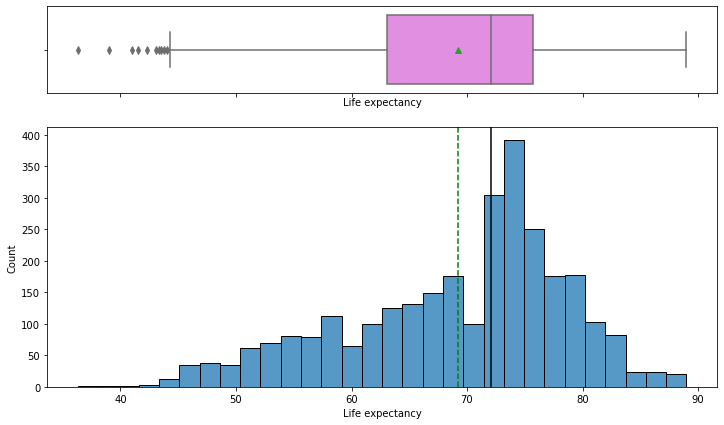

In [11]:
histogram_boxplot(df, "Life expectancy")

- Average life expectancy is 69 years. 
- There are countries with very short life expectancy where it's only 36, on the other hand, life expectancy can go up to 89 in other countries. 

**Let's explore per capita alcohol consumption**

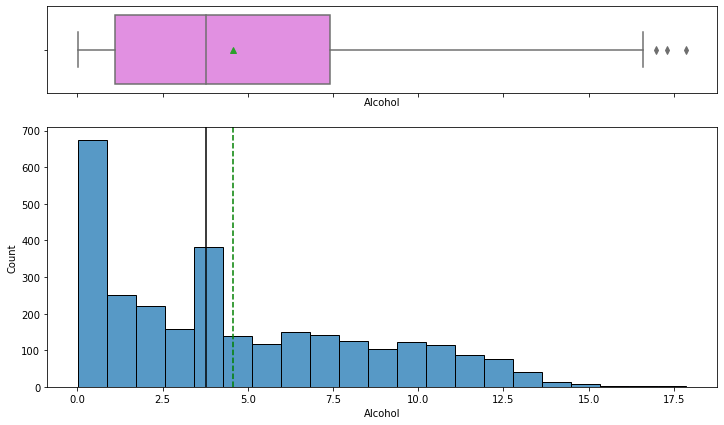

In [12]:
histogram_boxplot(df, "Alcohol")

- Many countries have very low alcohol consumption where it's below 0.8 liters.
- There are outliers where average alcohol consumption is more than 16 liters.


**Let's explore GDP**

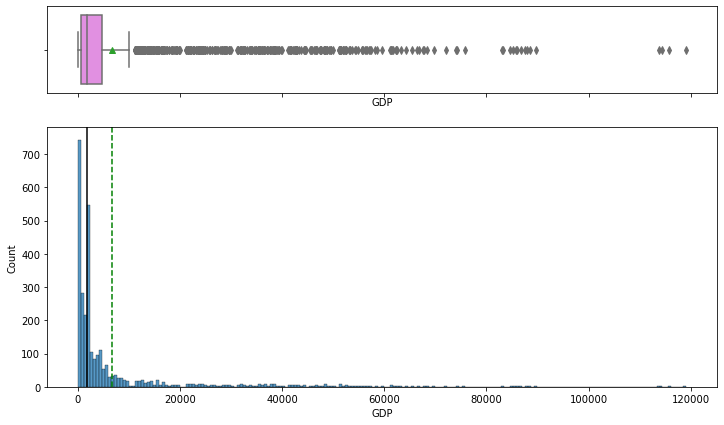

In [13]:
histogram_boxplot(df, "GDP")

- The distribution of GDP is heavily skewed to the right.
- The outliers to the right indicate that many countries have a very high GDP.

In [14]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

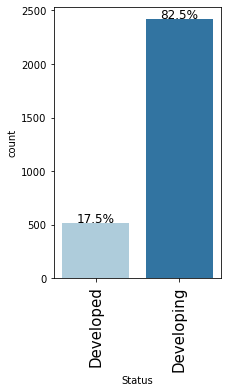

In [15]:
labeled_barplot(df, "Status", perc=True)

- More than 80% of the countries in the data are developing countries.

**Let's look at correlations.**

In [16]:
df[df.columns[:]].corr()["Life expectancy"][:]

Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
Infant deaths                     -0.196557
Alcohol                            0.390674
Percentage expenditure             0.381864
Hepatitis B                        0.171255
Measles                           -0.157586
BMI                                0.558888
Under-five deaths                 -0.222529
Polio                              0.459458
Total expenditure                  0.209588
Diphtheria                         0.473268
HIV/AIDS                          -0.556556
GDP                                0.430991
Population                        -0.028842
Thinness  1-19 years              -0.467859
Thinness 5-9 years                -0.462645
Income composition of resources    0.688591
Schooling                          0.717314
Name: Life expectancy, dtype: float64

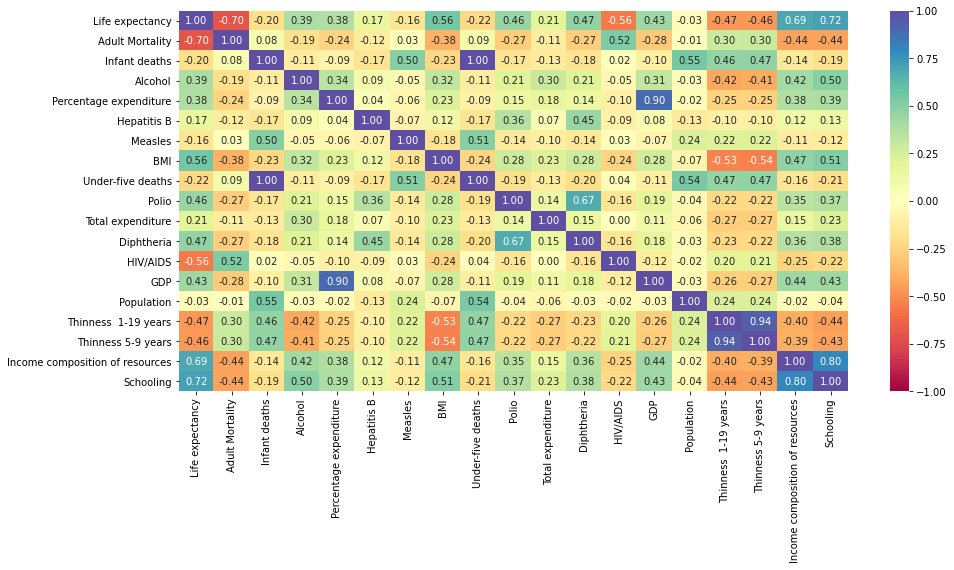

In [17]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")  

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

* `Life expectancy` is highly negatively correlated with `Adult Mortality` and `HIV/AIDs`.

* `Life expectancy` is highly positively correlated with `Schooling` and `Income composition of resources`.

**Let's look at the graphs of a few variables that are highly correlated with `Life expectancy`.**

**`Life expectancy` vs `HIV/AIDS` vs `Status`**

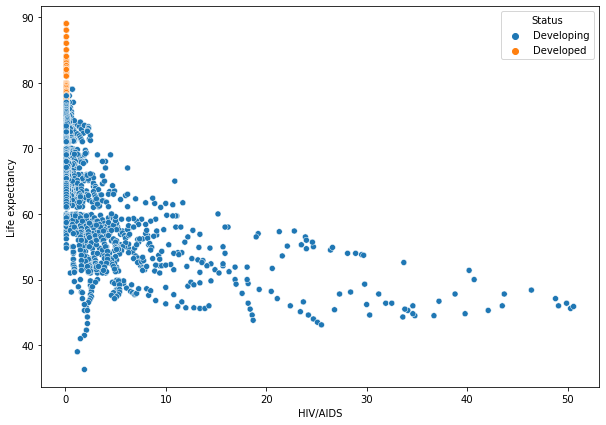

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life expectancy", x="HIV/AIDS", hue="Status", data=df)
plt.show()

* Developed countries have very low cases of HIV/AIDS.

**`Life expectancy` vs `Schooling` vs `Status`**

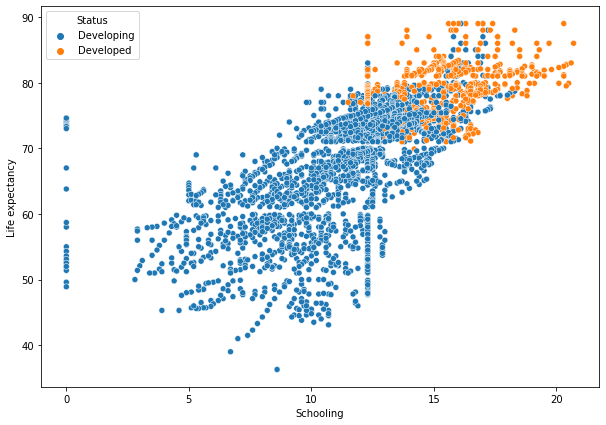

In [19]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life expectancy", x="Schooling", hue="Status", data=df)
plt.show()

* Majority of the developed countries have schooling of more than 13 years, where most of the developing countries have less than that.

**Let's check the variation in life expectancy across years.**

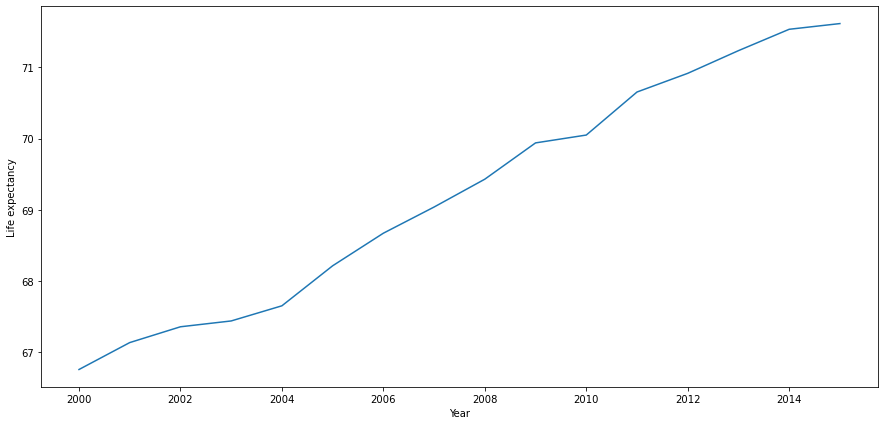

In [20]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year", y="Life expectancy", data=df, ci=None)
plt.show()

* Overall life expectancy has increased over the years.

#### Column binning

#### Let's group all countries into continents to avoid having too many dummy variables while modeling.

In [22]:
import pycountry_convert as pc


def country_to_continent(country_name):
    """
    country_name : name of country for which continent is needed
    """
    if "(" in country_name:
        country_name = country_name.split(" ")[0]
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(
        country_continent_code
    )
    return country_continent_name

In [23]:
df.Country.apply(country_to_continent)

KeyError: "Invalid Country Name: 'Republic of Korea'"

* There is an error message because names of the countries are different from what the library has. 
* In order to resolve this, I will hard-code them.

In [24]:
loc = df.Country.tolist()
continent = dict()

for cn in loc:
    if cn == "Republic of Korea":
        continent[cn] = "Asia"
    elif cn == "The former Yugoslav republic of Macedonia":
        continent[cn] = "Europe"
    elif cn == "Timor-Leste":
        continent[cn] = "Asia"
    else:
        continent[cn] = country_to_continent(cn)

In [25]:
df["Continent"] = df["Country"].map(continent)

In [26]:
print(df["Country"].map(continent).unique())

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


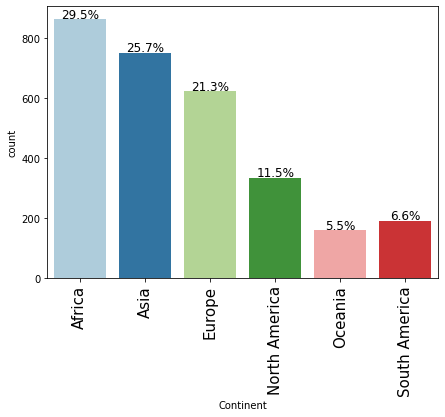

In [27]:
labeled_barplot(df, "Continent", perc=True)

**`Life expectancy` vs `Adult Mortality` vs `Continent`**

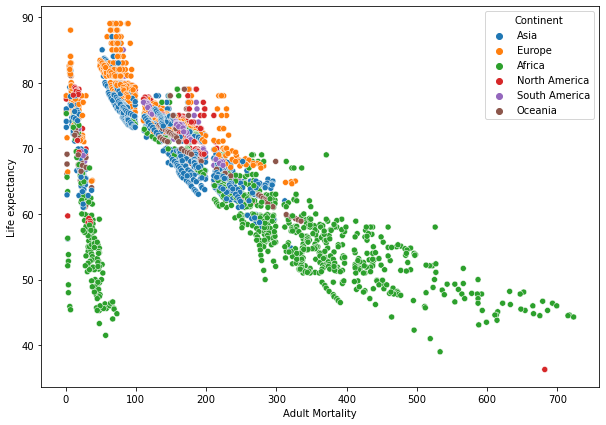

In [28]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life expectancy", x="Adult Mortality", hue="Continent", data=df)
plt.show()

* Most of the African countries have high adult mortality and low life expectancy.

**Median `Life expectancy` by `Continent` and `Status`**

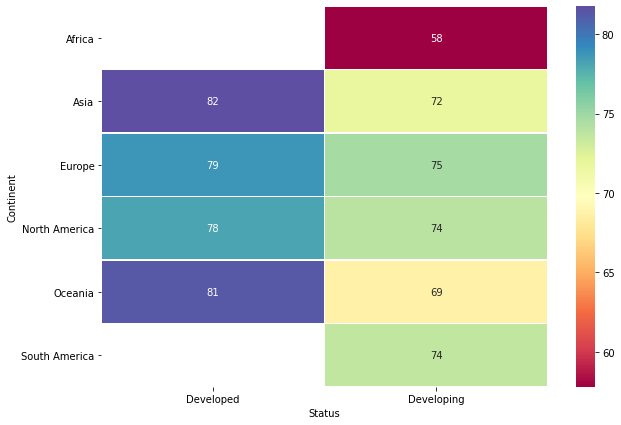

In [29]:
df_hm = df.pivot_table(
    index="Continent", columns="Status", values="Life expectancy", aggfunc=np.median
)

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_hm, cmap="Spectral", linewidths=0.5, annot=True, ax=ax)
plt.show()

- Developed Asia countries have the highest life expectancy.

### Linear Model Building

1. We want to predict the life expectancy.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [30]:
# converting the object type columns to category type

df["Country"] = df["Country"].astype("category")
df["Status"] = df["Status"].astype("category")
df["Continent"] = df["Continent"].astype("category")

In [31]:
# defining X and y variables

X = df.drop(["Life expectancy", "Country"], axis=1)
y = df["Life expectancy"]

print(X.head())
print(y.head())

   Year      Status  Adult Mortality  Infant deaths  Alcohol  \
0  2015  Developing            263.0             62     0.01   
1  2014  Developing            271.0             64     0.01   
2  2013  Developing            268.0             66     0.01   
3  2012  Developing            272.0             69     0.01   
4  2011  Developing            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles   BMI  Under-five deaths  ...  \
0               71.279624         65.0     1154  19.1                 83  ...   
1               73.523582         62.0      492  18.6                 86  ...   
2               73.219243         64.0      430  18.1                 89  ...   
3               78.184215         67.0     2787  17.6                 93  ...   
4                7.097109         68.0     3013  17.2                 97  ...   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33

In [32]:
X = sm.add_constant(X)

In [33]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,...,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1.0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,17.2,17.3,0.479,10.1,1,1,0,0,0,0
1,1.0,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,17.5,17.5,0.476,10.0,1,1,0,0,0,0
2,1.0,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,17.7,17.7,0.470,9.9,1,1,0,0,0,0
3,1.0,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,17.9,18.0,0.463,9.8,1,1,0,0,0,0
4,1.0,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,18.2,18.2,0.454,9.5,1,1,0,0,0,0


In [34]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2049
Number of rows in test data = 879


In [36]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     448.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:25:48   Log-Likelihood:                -5612.6
No. Observations:                2049   AIC:                         1.128e+04
Df Residuals:                    2023   BIC:                         1.142e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit. In this case, the value is 0.845. It's a good fit.

**Let's check the performance of the model using different metrics.**


In [37]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [38]:
# checking model performance on train set 

olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.7444,2.832731,0.847098,0.845132,4.308428


In [39]:
# checking model performance on test set 

olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.730845,2.820497,0.842311,0.837499,4.280578


- Numbers are pretty close on the training and test sets, which means the model does a pretty good job predicting.

- With a MAE of 2.8 and MAPE of 4.3, we know the model's predictions are pretty close to the actual values.

### Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### Test for Multicollinearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [41]:
checking_vif(x_train)

,feature,VIF
0,const,227205.392829
1,Year,1.191704
2,Adult Mortality,1.835454
3,Infant deaths,191.008892
4,Alcohol,2.470353
5,Percentage expenditure,5.631140
6,Hepatitis B,1.322443
7,Measles,1.432634
8,BMI,1.921698
9,Under-five deaths,190.547440


* `Thinness__1_19_years`,`Thinness__5_9_years`, `Percentage expenditure`, and `GDP` have VIFs slightly greater than 5.
* `Infant_deaths` and `Under_five_deaths` have a VIF score of much greater than 5.
    * It appears that these 2 variables are correlated with each other, which makes sense because there would have a overlap between the two variables.

#### Removing Multicollinearity



In [42]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [43]:
col_list = [
    "Infant deaths",
    "Under-five deaths",
    "Percentage expenditure",
    "GDP",
    "Thinness  1-19 years",
    "Thinness 5-9 years",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Thinness 1-19 years,0.845273,3.767592
1,Thinness 5-9 years,0.845175,3.768790
2,GDP,0.845073,3.770029
3,Percentage expenditure,0.845065,3.770129
4,Infant deaths,0.842042,3.806727
5,Under-five deaths,0.841800,3.809645


* Dropping `Under-five deaths` would have the biggest impact on the predictive power of the model.
* We'll drop `Thinness  1-19 years` first since it has the least impact.

In [44]:
col_to_drop = "Thinness  1-19 years"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

vif = checking_vif(x_train2)
vif

,feature,VIF
0,const,227163.382376
1,Year,1.191427
2,Adult Mortality,1.835454
3,Infant deaths,190.684749
4,Alcohol,2.465115
5,Percentage expenditure,5.631131
6,Hepatitis B,1.322159
7,Measles,1.432441
8,BMI,1.920484
9,Under-five deaths,190.336121


* Dropping `Thinness  1-19 years` has brought the VIF of `Thinness 5-9 years` below 5.
* `Infant deaths` and `Under-five deaths` still have a VIF score of much greater than 5.

In [45]:
col_list = [
    "Infant deaths",
    "Under-five deaths",
    "Percentage expenditure",
    "GDP",
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,GDP,0.845139,3.769228
1,Percentage expenditure,0.845130,3.769338
2,Infant deaths,0.842119,3.805800
3,Under-five deaths,0.841876,3.808728


- We will drop `GDP` next.

In [46]:
col_to_drop = "GDP"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

vif = checking_vif(x_train3)
vif

,feature,VIF
0,const,224205.117775
1,Year,1.175926
2,Adult Mortality,1.833756
3,Infant deaths,190.073929
4,Alcohol,2.454605
5,Percentage expenditure,1.383310
6,Hepatitis B,1.321552
7,Measles,1.432193
8,BMI,1.914150
9,Under-five deaths,189.710454


* Dropping `GDP` has brought the VIF of `Percentage expenditure` below 5.
* `Infant deaths` and `Under-five deaths` still have a VIF score of much greater than 5.

In [47]:
col_list = [
    "Infant deaths",
    "Under-five deaths",
]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,Infant deaths,0.842069,3.806404
1,Under-five deaths,0.841830,3.809287


- We will drop `Infant deaths` next.

In [48]:
col_to_drop = "Infant deaths"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

vif = checking_vif(x_train4)
vif

,feature,VIF
0,const,224187.636224
1,Year,1.175885
2,Adult Mortality,1.833601
3,Alcohol,2.426863
4,Percentage expenditure,1.382397
5,Hepatitis B,1.316589
6,Measles,1.432191
7,BMI,1.913549
8,Under-five deaths,2.219838
9,Polio,1.897319


- Multicollinearity has been removed.

In [49]:
olsmod1 = sm.OLS(y_train, x_train4).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     497.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:27:15   Log-Likelihood:                -5634.7
No. Observations:                2049   AIC:                         1.132e+04
Df Residuals:                    2026   BIC:                         1.144e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- Adj. R-squared has only dropped from 0.845 to 0.842. It is a slight decrease.
- Next we will look at the p-values.

In [50]:
# initial list of columns
cols = x_train4.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train4[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['Year', 'Adult Mortality', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'BMI', 'Under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Status_Developing', 'Continent_Asia', 'Continent_Europe', 'Continent_North America', 'Continent_Oceania', 'Continent_South America']


In [51]:
x_train5 = x_train4[["const"] + selected_features]
x_test5 = x_test4[["const"] + selected_features]

In [52]:
olsmod2 = sm.OLS(y_train, x_train5).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     575.6
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:27:22   Log-Likelihood:                -5636.5
No. Observations:                2049   AIC:                         1.131e+04
Df Residuals:                    2029   BIC:                         1.143e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Now no feature (other than the constant) has p-value greater than 0.05, so we'll consider the features in *x_train5* as the final set of predictor variables and *olsmod2* as final model.**

* Now adjusted R-squared is 0.842, it means that the model is able to explain ~84% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.845. This shows that the variables we dropped were not affecting the model much.

#### Test for linearity and independence


In [53]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  
df_pred["Fitted Values"] = olsmod2.fittedvalues  
df_pred["Residuals"] = olsmod2.resid  

df_pred.head()

,Actual Values,Fitted Values,Residuals
608,64.7,58.396287,6.303713
348,46.4,46.844307,-0.444307
1410,71.1,72.897591,-1.797591
1730,63.2,68.012416,-4.812416
612,62.9,61.834162,1.065838


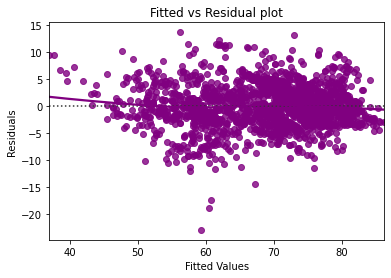

In [54]:
# plotting the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* We see no pattern in the graph above. Therefore, the assumptions of linearity and independence are satisfied.

#### Test for normality

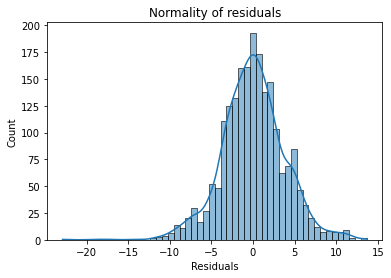

In [55]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

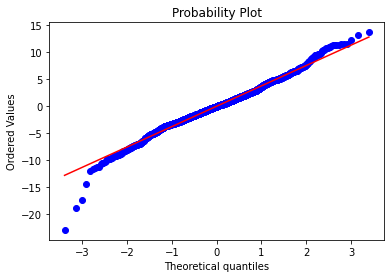

In [56]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [57]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9869108200073242, pvalue=9.740090678445057e-13)

- P-value is less than 0.05, the residuals are not normally distributed per Shapiro-Wilk test.
- However, based on the graphs, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

#### Test for Homoscedascity

In [58]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train5)
lzip(name, test)

[('F statistic', 0.9830406677988949), ('p-value', 0.6067961354027434)]

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

**All the assumptions are satisfied.**
**And we have a final model**

In [59]:
# predictions on the test set
pred = olsmod2.predict(x_test5)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
45,71.6,66.185783
1294,79.9,79.784195
187,75.2,75.787198
661,78.8,78.745847
2788,52.2,55.639856
151,73.0,72.287647
2845,71.4,67.126506
1639,83.0,78.023254
393,72.2,73.905880
1607,76.7,71.833115


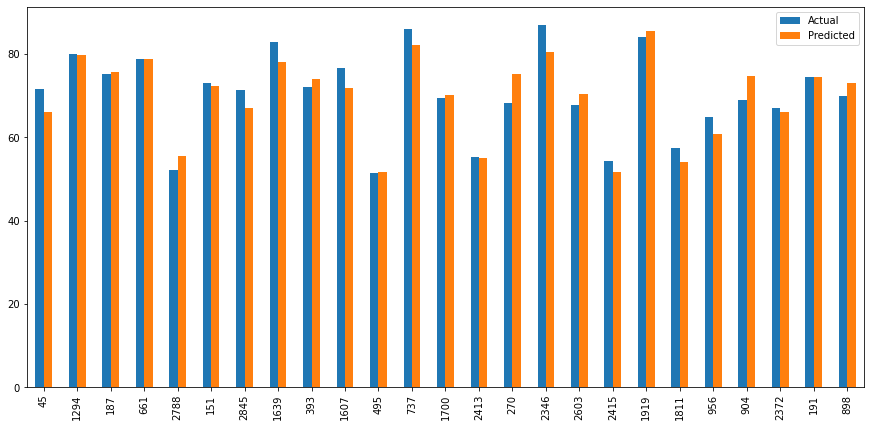

In [60]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

- The model returns a pretty good prediction.

In [61]:
# checking model performance on train set
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train5, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.788223,2.869585,0.843498,0.841954,4.369148


In [62]:
# checking model performance on test set
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test5, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.770886,2.854912,0.838908,0.835153,4.333436


* The model is able to explain 84% of the variation in the data, which is very good.

* RMSE and MAE in training set and test set are close, and they are all pretty low. The model performances pretty well.

* The MAPE on the test set suggests we can predict within 4.3% of the life expectancy. 

* Overall the model *olsmod2* is good for prediction.

**Let's compare this model to the initial model.**

In [63]:
models_train_comp_df = pd.concat(
    [olsmodel_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,3.744400,3.788223
MAE,2.832731,2.869585
R-squared,0.847098,0.843498
Adj. R-squared,0.845132,0.841954
MAPE,4.308428,4.369148


In [64]:
models_test_comp_df = pd.concat(
    [olsmodel_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,3.730845,3.770886
MAE,2.820497,2.854912
R-squared,0.842311,0.838908
Adj. R-squared,0.837499,0.835153
MAPE,4.280578,4.333436


* The performance of the two models is close to each other.

**Let's create the final statsmodels model and print it's summary to gain insights.**

In [65]:
olsmodel_final = sm.OLS(y_train, x_train5).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     575.6
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:28:07   Log-Likelihood:                -5636.5
No. Observations:                2049   AIC:                         1.131e+04
Df Residuals:                    2029   BIC:                         1.143e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Insights

1. Mortality rates (`Under_five_deaths` and `Adult_mortality`) come out to be very significant, as expected. As these two increase, the total life expectancy decreases.


2. 1 unit increase in per capita consumption of pure alcohol (in liters) leads to a decrease in life expectancy by 0.0801 years (~29 days).


3. Diseases like `Hepatitis_B` and `HIV_AIDS` decrease the life expectancy.


4. Developing countries tend to have 2.6 years less life expectancy compared to developed countries.


5. People from Asia, Europe, North America, South America, and Oceania have a higher life expectancy than people of Africa.


6. `Year`, `Percentage_expenditure`, `Polio`, `Diptheria`, `Income  composition of resources`, and `Schooling` have positive coefficients. So, as they increase, life expectancy also increases.